<a href="https://colab.research.google.com/github/Mahender-224/Data-Science-Assignments/blob/main/Topic_Modelling_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("articles1.csv")

In [3]:
df.head()

,author,claps,reading_time,link,title,text
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"Oh, how the headlines blared:\nChatbots were T..."
1,Conor Dewey,1.4K,7,https://towardsdatascience.com/python-for-data...,Python for Data Science: 8 Concepts You May Ha...,If you’ve ever found yourself looking up the s...
2,William Koehrsen,2.8K,11,https://towardsdatascience.com/automated-featu...,Automated Feature Engineering in Python – Towa...,Machine learning is increasingly moving from h...
3,Gant Laborde,1.3K,7,https://medium.freecodecamp.org/machine-learni...,Machine Learning: how to go from Zero to Hero ...,If your understanding of A.I. and Machine Lear...
4,Emmanuel Ameisen,935,11,https://blog.insightdatascience.com/reinforcem...,Reinforcement Learning from scratch – Insight ...,Want to learn about applied Artificial Intelli...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author        337 non-null    object
 1   claps         337 non-null    object
 2   reading_time  337 non-null    int64 
 3   link          337 non-null    object
 4   title         337 non-null    object
 5   text          337 non-null    object
dtypes: int64(1), object(5)
memory usage: 15.9+ KB


In [5]:
df.shape

(337, 6)

In [6]:
text = df["text"]

In [7]:
text = text.apply(lambda x: x.lower())

In [8]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 19.0 MB/s eta 0:00:00


In [9]:
text[0]

"oh, how the headlines blared:\nchatbots were the next big thing.\nour hopes were sky high. bright-eyed and bushy-tailed, the industry was ripe for a new era of innovation: it was time to start socializing with machines.\nand why wouldn’t they be? all the road signs pointed towards insane success.\nat the mobile world congress 2017, chatbots were the main headliners. the conference organizers cited an ‘overwhelming acceptance at the event of the inevitable shift of focus for brands and corporates to chatbots’.\nin fact, the only significant question around chatbots was who would monopolize the field, not whether chatbots would take off in the first place:\none year on, we have an answer to that question.\nno.\nbecause there isn’t even an ecosystem for a platform to dominate.\nchatbots weren’t the first technological development to be talked up in grandiose terms and then slump spectacularly.\nthe age-old hype cycle unfolded in familiar fashion...\nexpectations built, built, and then...

We can use contractions to replace all the words that are written in short form

In [10]:
import contractions

In [11]:
expanded = []
for i in range(len(text)):
  for word in text[i].split():
    expanded.append(contractions.fix(word))
  text[i] = " ".join(expanded)
  expanded = []

In [12]:
text[0]

"oh, how the headlines blared: chatbots were the next big thing. our hopes were sky high. bright-eyed and bushy-tailed, the industry was ripe for a new era of innovation: it was time to start socializing with machines. and why would not they be? all the road signs pointed towards insane success. at the mobile world congress 2017, chatbots were the main headliners. the conference organizers cited an ‘overwhelming acceptance at the event of the inevitable shift of focus for brands and corporates to chatbots’. in fact, the only significant question around chatbots was who would monopolize the field, not whether chatbots would take off in the first place: one year on, we have an answer to that question. no. because there is not even an ecosystem for a platform to dominate. chatbots were not the first technological development to be talked up in grandiose terms and then slump spectacularly. the age-old hype cycle unfolded in familiar fashion... expectations built, built, and then..... it al

In [15]:
import nltk
from nltk.corpus import stopwords

Let's remove the stopwords

In [16]:
nltk.download("stopwords")
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
def removing_stopwords(x):
  sw = []
  for word in x.split():
    if word not in stop_words:
      sw.append(word)
  x = " ".join(sw)
  return x

In [18]:
text = text.apply(lambda x: removing_stopwords(x))

In [19]:
text[0]

"oh, headlines blared: chatbots next big thing. hopes sky high. bright-eyed bushy-tailed, industry ripe new era innovation: time start socializing machines. would be? road signs pointed towards insane success. mobile world congress 2017, chatbots main headliners. conference organizers cited ‘overwhelming acceptance event inevitable shift focus brands corporates chatbots’. fact, significant question around chatbots would monopolize field, whether chatbots would take first place: one year on, answer question. no. even ecosystem platform dominate. chatbots first technological development talked grandiose terms slump spectacularly. age-old hype cycle unfolded familiar fashion... expectations built, built, then..... kind fizzled out. predicted paradim shift materialize. apps are, tellingly, still alive well. look back breathless optimism turn other, slightly baffled: “is it? chatbot revolution promised?” digit’s ethan bloch sums general consensus: according dave feldman, vice president prod

In [20]:
import nltk
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

Let's try to lemmitize the words

In [25]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [26]:
def lemmatize_process(x):
  lemm = []
  for word in x.split():
    lemm.append(lemmatizer.lemmatize(word))
  x = " ".join(lemm)
  return x

In [27]:
text = text.apply(lambda x: lemmatize_process(x))

In [28]:
text[0]

"oh, headline blared: chatbots next big thing. hope sky high. bright-eyed bushy-tailed, industry ripe new era innovation: time start socializing machines. would be? road sign pointed towards insane success. mobile world congress 2017, chatbots main headliners. conference organizer cited ‘overwhelming acceptance event inevitable shift focus brand corporates chatbots’. fact, significant question around chatbots would monopolize field, whether chatbots would take first place: one year on, answer question. no. even ecosystem platform dominate. chatbots first technological development talked grandiose term slump spectacularly. age-old hype cycle unfolded familiar fashion... expectation built, built, then..... kind fizzled out. predicted paradim shift materialize. apps are, tellingly, still alive well. look back breathless optimism turn other, slightly baffled: “is it? chatbot revolution promised?” digit’s ethan bloch sum general consensus: according dave feldman, vice president product desi

Let's try to remove the stopwords after we lemmitize

In [30]:
text = text.apply(lambda x: removing_stopwords(x))

In [31]:
text[0]

"oh, headline blared: chatbots next big thing. hope sky high. bright-eyed bushy-tailed, industry ripe new era innovation: time start socializing machines. would be? road sign pointed towards insane success. mobile world congress 2017, chatbots main headliners. conference organizer cited ‘overwhelming acceptance event inevitable shift focus brand corporates chatbots’. fact, significant question around chatbots would monopolize field, whether chatbots would take first place: one year on, answer question. no. even ecosystem platform dominate. chatbots first technological development talked grandiose term slump spectacularly. age-old hype cycle unfolded familiar fashion... expectation built, built, then..... kind fizzled out. predicted paradim shift materialize. apps are, tellingly, still alive well. look back breathless optimism turn other, slightly baffled: “is it? chatbot revolution promised?” digit’s ethan bloch sum general consensus: according dave feldman, vice president product desi

In [32]:
import re
import string

Removing the punctuations

In [33]:
text = text.apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

Removing the digits

In [34]:
text = text.apply(lambda x: re.sub('\w*\d\w*','', x))

Lets print the word cloud and see what are the words that are ferquently repeating

In [35]:
import wordcloud
from wordcloud import WordCloud

In [36]:
full_text = " ".join(text)

In [37]:
full_text

'oh headline blared chatbots next big thing hope sky high brighteyed bushytailed industry ripe new era innovation time start socializing machines would be road sign pointed towards insane success mobile world congress  chatbots main headliners conference organizer cited ‘overwhelming acceptance event inevitable shift focus brand corporates chatbots’ fact significant question around chatbots would monopolize field whether chatbots would take first place one year on answer question no even ecosystem platform dominate chatbots first technological development talked grandiose term slump spectacularly ageold hype cycle unfolded familiar fashion expectation built built then kind fizzled out predicted paradim shift materialize apps are tellingly still alive well look back breathless optimism turn other slightly baffled “is it chatbot revolution promised” digit’s ethan bloch sum general consensus according dave feldman vice president product design heap chatbots take one difficult problem fail

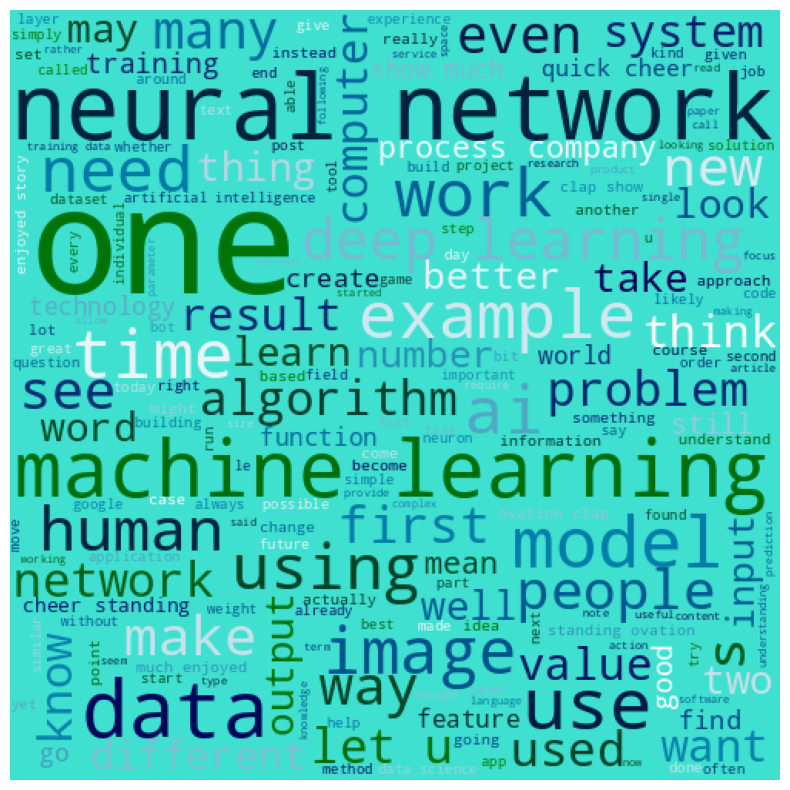

In [38]:
#ploting the word cloud
plt.figure(figsize=(10, 10))
wordcloud = WordCloud(width = 500, height = 500, background_color='#40E0D0', colormap="ocean",  random_state=10).generate(full_text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Now let's build a vocabulary i.e set of bag of unique words

In [39]:
tokenized_words = text.apply(lambda x: x.split())

In [40]:
tokenized_words

0      [oh, headline, blared, chatbots, next, big, th...
1      [ever, found, looking, question, concept, synt...
2      [machine, learning, increasingly, moving, hand...
3      [understanding, ai, machine, learning, big, qu...
4      [want, learn, applied, artificial, intelligenc...
                             ...                        
332    [click, share, article, linkedin, », skip, par...
333    [opinion, deep, neural, network, machine, lear...
334    [everyone, remotely, tuned, recent, progress, ...
335    [one, biggest, misconception, around, idea, de...
336    [believe, psychologistphilosopher, brain, like...
Name: text, Length: 337, dtype: object

In [41]:
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel

In [42]:
vocabulary = Dictionary(tokenized_words)

In [43]:
vocabulary

In [44]:
bow_doc = [vocabulary.doc2bow(sent) for sent in tokenized_words]

In [45]:
lda = LdaModel(bow_doc, num_topics = 10, id2word=vocabulary, random_state = 10, update_every=1, chunksize = 100, passes = 10, alpha='symmetric', per_word_topics=True, eta = 0.6)

In [46]:
lda.print_topics()

[(0,
  '0.023*"de" + 0.012*"la" + 0.008*"en" + 0.007*"que" + 0.006*"le" + 0.005*"para" + 0.004*"el" + 0.004*"e" + 0.004*"et" + 0.003*"como"'),
 (1,
  '0.014*"learning" + 0.011*"course" + 0.011*"machine" + 0.006*"data" + 0.004*"python" + 0.004*"rating" + 0.004*"reviews" + 0.004*"free" + 0.004*"average" + 0.003*"weighted"'),
 (2,
  '0.003*"backward" + 0.003*"zero" + 0.003*"backpropagation" + 0.002*"pas" + 0.002*"gradient" + 0.002*"forward" + 0.002*"backprop" + 0.002*"delta" + 0.001*"lecture" + 0.001*"nonlinearity"'),
 (3,
  '0.013*"image" + 0.009*"rcnn" + 0.006*"object" + 0.005*"inception" + 0.005*"region" + 0.005*"box" + 0.004*"bounding" + 0.004*"cnn" + 0.004*"pi" + 0.003*"raspberry"'),
 (4,
  '0.006*"—" + 0.006*"human" + 0.004*"men" + 0.003*"computer" + 0.003*"attracted" + 0.003*"ai" + 0.003*"woman" + 0.002*"intelligence" + 0.002*"face" + 0.002*"facial"'),
 (5,
  '0.006*"gtx" + 0.005*"cheat" + 0.005*"sheet" + 0.005*"gpus" + 0.005*"cpu" + 0.004*"ti" + 0.004*"card" + 0.003*"gpu" + 0.003*

In [47]:
doc_lda = lda[bow_doc]

In [48]:
from gensim.models import CoherenceModel

In [49]:
# let's check the perplexity score
print("Perplexity: ", lda.log_perplexity(bow_doc))

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda, texts=tokenized_words, dictionary=vocabulary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

Perplexity:  -8.208904859842777

Coherence Score:  0.47671834225478005


From above we can see that perplexity value is very less which says our model is a good model.

Let's try with different valeus of n, alpha and beta and check the coherence scores

In [50]:
# Let's now do the parameter tuning
def calculate_coherence_score(n, alpha, beta):
    lda = LdaModel(corpus=bow_doc,id2word=vocabulary,
                                           num_topics=n, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=alpha,
                                           per_word_topics=True,
                                           eta = beta)
    cml = CoherenceModel(model=lda, texts=tokenized_words, dictionary=vocabulary, coherence='c_v')
    cl = cml.get_coherence()
    return cl

#list containing various hyperparameters
n = [2,5,7,10,12,14]
alphas = ['symmetric',0.3,0.5,0.7]
betas = ['auto',0.3,0.5,0.7]


for i in n:
    for alpha in alphas:
        for beta in betas:
            coherence_score = calculate_coherence_score(i, alpha, beta)
            print(f"n : {i} ; alpha : {alpha} ; beta : {beta} ; Score : {coherence_score}")

n : 2 ; alpha : symmetric ; beta : auto ; Score : 0.35958531690703177
n : 2 ; alpha : symmetric ; beta : 0.3 ; Score : 0.3475594247194438
n : 2 ; alpha : symmetric ; beta : 0.5 ; Score : 0.35958531690703177


n : 2 ; alpha : symmetric ; beta : 0.7 ; Score : 0.3595853169070317
n : 2 ; alpha : 0.3 ; beta : auto ; Score : 0.353778610596565
n : 2 ; alpha : 0.3 ; beta : 0.3 ; Score : 0.33891427555002845
n : 2 ; alpha : 0.3 ; beta : 0.5 ; Score : 0.353778610596565


n : 2 ; alpha : 0.3 ; beta : 0.7 ; Score : 0.3595853169070317
n : 2 ; alpha : 0.5 ; beta : auto ; Score : 0.35958531690703177
n : 2 ; alpha : 0.5 ; beta : 0.3 ; Score : 0.3475594247194438
n : 2 ; alpha : 0.5 ; beta : 0.5 ; Score : 0.35958531690703177


n : 2 ; alpha : 0.5 ; beta : 0.7 ; Score : 0.3595853169070317
n : 2 ; alpha : 0.7 ; beta : auto ; Score : 0.35958531690703177
n : 2 ; alpha : 0.7 ; beta : 0.3 ; Score : 0.3475594247194438
n : 2 ; alpha : 0.7 ; beta : 0.5 ; Score : 0.35958531690703177
n : 2 ; alpha : 0.7 ; beta : 0.7 ; Score : 0.3595853169070317
n : 5 ; alpha : symmetric ; beta : auto ; Score : 0.39532188856595163
n : 5 ; alpha : symmetric ; beta : 0.3 ; Score : 0.3698479284219497
n : 5 ; alpha : symmetric ; beta : 0.5 ; Score : 0.42255221504688434
n : 5 ; alpha : symmetric ; beta : 0.7 ; Score : 0.4471199526763659
n : 5 ; alpha : 0.3 ; beta : auto ; Score : 0.39532188856595163
n : 5 ; alpha : 0.3 ; beta : 0.3 ; Score : 0.36943944686369495
n : 5 ; alpha : 0.3 ; beta : 0.5 ; Score : 0.42255221504688434
n : 5 ; alpha : 0.3 ; beta : 0.7 ; Score : 0.4471199526763659
n : 5 ; alpha : 0.5 ; beta : auto ; Score : 0.38407446178828536
n : 5 ; alpha : 0.5 ; beta : 0.3 ; Score : 0.3525407922779995
n : 5 ; alpha : 0.5 ; beta : 0.5 ;

From above we can see that score is high at alpha = 0.7, beta = 0.7 and n = 14

From above we can see that model with number of topic = 14, alpha = 0.7 and beta = 0.7 have the highest coherence scroe i.e 0.605547375801514

Let's try using BERT and LDA

In [62]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 104.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 117.4 MB/s eta 0:00:00


In [72]:
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
from tensorflow import keras

In [73]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained('bert-base-uncased')

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [74]:
def encode_documents(docs):
  encoded_docs = []
  for doc in docs:
    tokens = tokenizer.tokenize(doc)
    encoded_inputs = tokenizer.encode_plus(tokens, padding = 'longest', truncation = True, return_tensors = 'tf')
    outputs = model(encoded_inputs["input_ids"])
    encoded_docs.append(outputs.pooler_output.numpy())
  return encoded_docs

In [75]:
def prepare_lda_input(encoded_docs):
  dictionary = Dictionary(processed_corpus)
  corpus = [dictionary.doc2bow(doc) for doc in processed_corpus]
  return corpus, dictionary

In [76]:
def train_model(corpus, dictinaory, num_topics):
  if not corpus or not dictionary:
    raise ValueError("Empty corpus or dictionary")
  lda = LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=num_topics
    )
  return lda

def extract_topics(lda, num_words = 5):
  topics = lda.print_topics(num_words = num_words)
  return topics

In [77]:
encoded_docs = encode_documents(text)

In [78]:
corpus, dictionary = prepare_lda_input(encoded_docs)

In [79]:
lda = train_model(corpus, dictionary, 10)

In [80]:
topics = extract_topics(lda)

In [81]:
for topic in topics:
  print(topic)

(0, '0.007*"network" + 0.006*"u" + 0.005*"like" + 0.005*"learning" + 0.005*"neural"')
(1, '0.007*"learning" + 0.007*"data" + 0.005*"one" + 0.005*"network" + 0.005*"model"')
(2, '0.007*"data" + 0.007*"learning" + 0.006*"machine" + 0.005*"network" + 0.005*"like"')
(3, '0.010*"network" + 0.007*"learning" + 0.007*"neural" + 0.006*"one" + 0.006*"data"')
(4, '0.008*"image" + 0.008*"network" + 0.008*"data" + 0.008*"learning" + 0.006*"model"')
(5, '0.008*"data" + 0.007*"network" + 0.006*"human" + 0.006*"learning" + 0.005*"one"')
(6, '0.009*"learning" + 0.007*"one" + 0.007*"data" + 0.006*"network" + 0.005*"like"')
(7, '0.012*"learning" + 0.009*"machine" + 0.008*"data" + 0.006*"network" + 0.006*"one"')
(8, '0.008*"data" + 0.007*"network" + 0.006*"would" + 0.006*"one" + 0.006*"learning"')
(9, '0.009*"data" + 0.007*"learning" + 0.006*"neural" + 0.006*"would" + 0.006*"network"')


In [82]:
# lets see the topics for documents
for i, doc in enumerate(processed_corpus):
  bow_vector = dictionary.doc2bow(doc)
  topic_probs = lda.get_document_topics(bow_vector)
  dominant_topic = max(topic_probs, key = lambda x: x[1])
  topic_id = dominant_topic[0]
  print(f"Document {i + 1} is tagged with topic {topic_id + 1}")

Document 1 is tagged with topic 6
Document 2 is tagged with topic 7
Document 3 is tagged with topic 8
Document 4 is tagged with topic 9
Document 5 is tagged with topic 8
Document 6 is tagged with topic 4
Document 7 is tagged with topic 8
Document 8 is tagged with topic 10
Document 9 is tagged with topic 3
Document 10 is tagged with topic 9
Document 11 is tagged with topic 8
Document 12 is tagged with topic 4
Document 13 is tagged with topic 1
Document 14 is tagged with topic 9
Document 15 is tagged with topic 4
Document 16 is tagged with topic 5
Document 17 is tagged with topic 9
Document 18 is tagged with topic 8
Document 19 is tagged with topic 9
Document 20 is tagged with topic 8
Document 21 is tagged with topic 6
Document 22 is tagged with topic 10
Document 23 is tagged with topic 8
Document 24 is tagged with topic 8
Document 25 is tagged with topic 9
Document 26 is tagged with topic 9
Document 27 is tagged with topic 10
Document 28 is tagged with topic 10
Document 29 is tagged wit

In [83]:
cml = CoherenceModel(model = lda, texts = tokenized_words, dictionary = dictionary, coherence = 'c_v')
cl = cml.get_coherence()
print("Coherence Score: ", cl)

Coherence Score:  0.2902079899997742


From above we can see that we have good coherence score without using BERT.